In [19]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# with open('../evaluations/test_results/VIT32/ImageNet_RISE_embed_dist_test_1000_images.csv', newline='') as csvfile:
with open('../evaluations/test_results/VIT16/ImageNet_RISE_embed_dist_test_1000_images.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
# unpack the matrices, but ignore the two rows of text 0 and 3
data_input_pert = []
for i in range(len(data)):
    if i != 0 and i != 3:
        data_input_pert.append(np.asarray(data[i], dtype = float))


# with open('../evaluations/test_results/VIT32/ImageNet_RISE_smooth_embed_dist_test_1000_images.csv', newline='') as csvfile:
with open('../evaluations/test_results/VIT16/ImageNet_RISE_smooth_embed_dist_test_1000_images.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
# unpack the matrices, but ignore the two rows of text 0 and 3
data_input_pert_smooth = []
for i in range(len(data)):
    if i != 0 and i != 3:
        data_input_pert_smooth.append(np.asarray(data[i], dtype = float))

# with open('../evaluations/test_results/VIT32/ImageNet_RISE_VIT_embed_dist_test_1000_images.csv', newline='') as csvfile:
with open('../evaluations/test_results/VIT16/ImageNet_RISE_VIT_embed_dist_test_1000_images.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
# unpack the matrices, but ignore the two rows of text 0 and 3
data_attn_pert = []
for i in range(len(data)):
    if i != 0 and i != 3:
        data_attn_pert.append(np.asarray(data[i], dtype = float))


print((np.mean(np.array(data_input_pert_smooth[14:26])) + np.mean(np.array(data_input_pert_smooth[38:50]))) / 2)
print((np.mean(np.array(data_attn_pert[14:26])) + np.mean(np.array(data_attn_pert[38:50]))) / 2)

print(np.mean(np.array(data_input_pert_smooth[14:26]), axis = -1).round(3))
print(np.mean(np.array(data_attn_pert[14:26]), axis = -1).round(3))

print(np.mean(np.array(data_input_pert_smooth[38:50]), axis = -1).round(3))
print(np.mean(np.array(data_attn_pert[38:50]), axis = -1).round(3))


# from the csv files:
    # rows 0 and 1 and ins and del score curves
    # rows 14 - 25 are ins cos sim
    # rows 38 - 49 are del cos sim

0.5929416768316413
0.7387361569528341
[0.87  0.724 0.661 0.627 0.608 0.585 0.568 0.54  0.523 0.532 0.568 0.701]
[0.952 0.904 0.841 0.791 0.751 0.716 0.689 0.668 0.649 0.647 0.694 0.781]
[0.851 0.693 0.629 0.588 0.564 0.531 0.504 0.466 0.441 0.435 0.433 0.59 ]
[0.952 0.905 0.843 0.789 0.749 0.7   0.661 0.622 0.588 0.565 0.574 0.698]


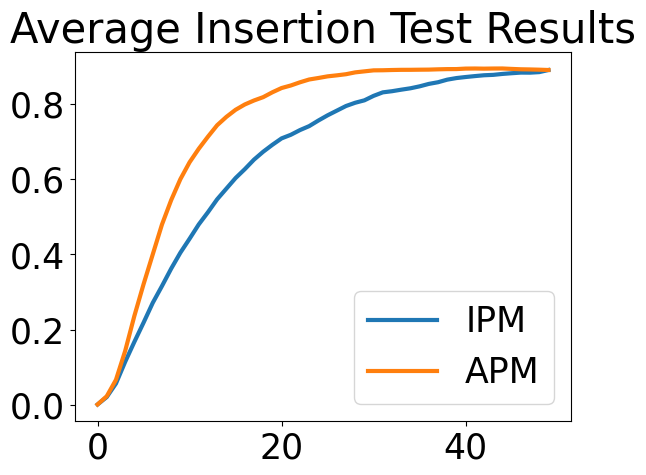

[]

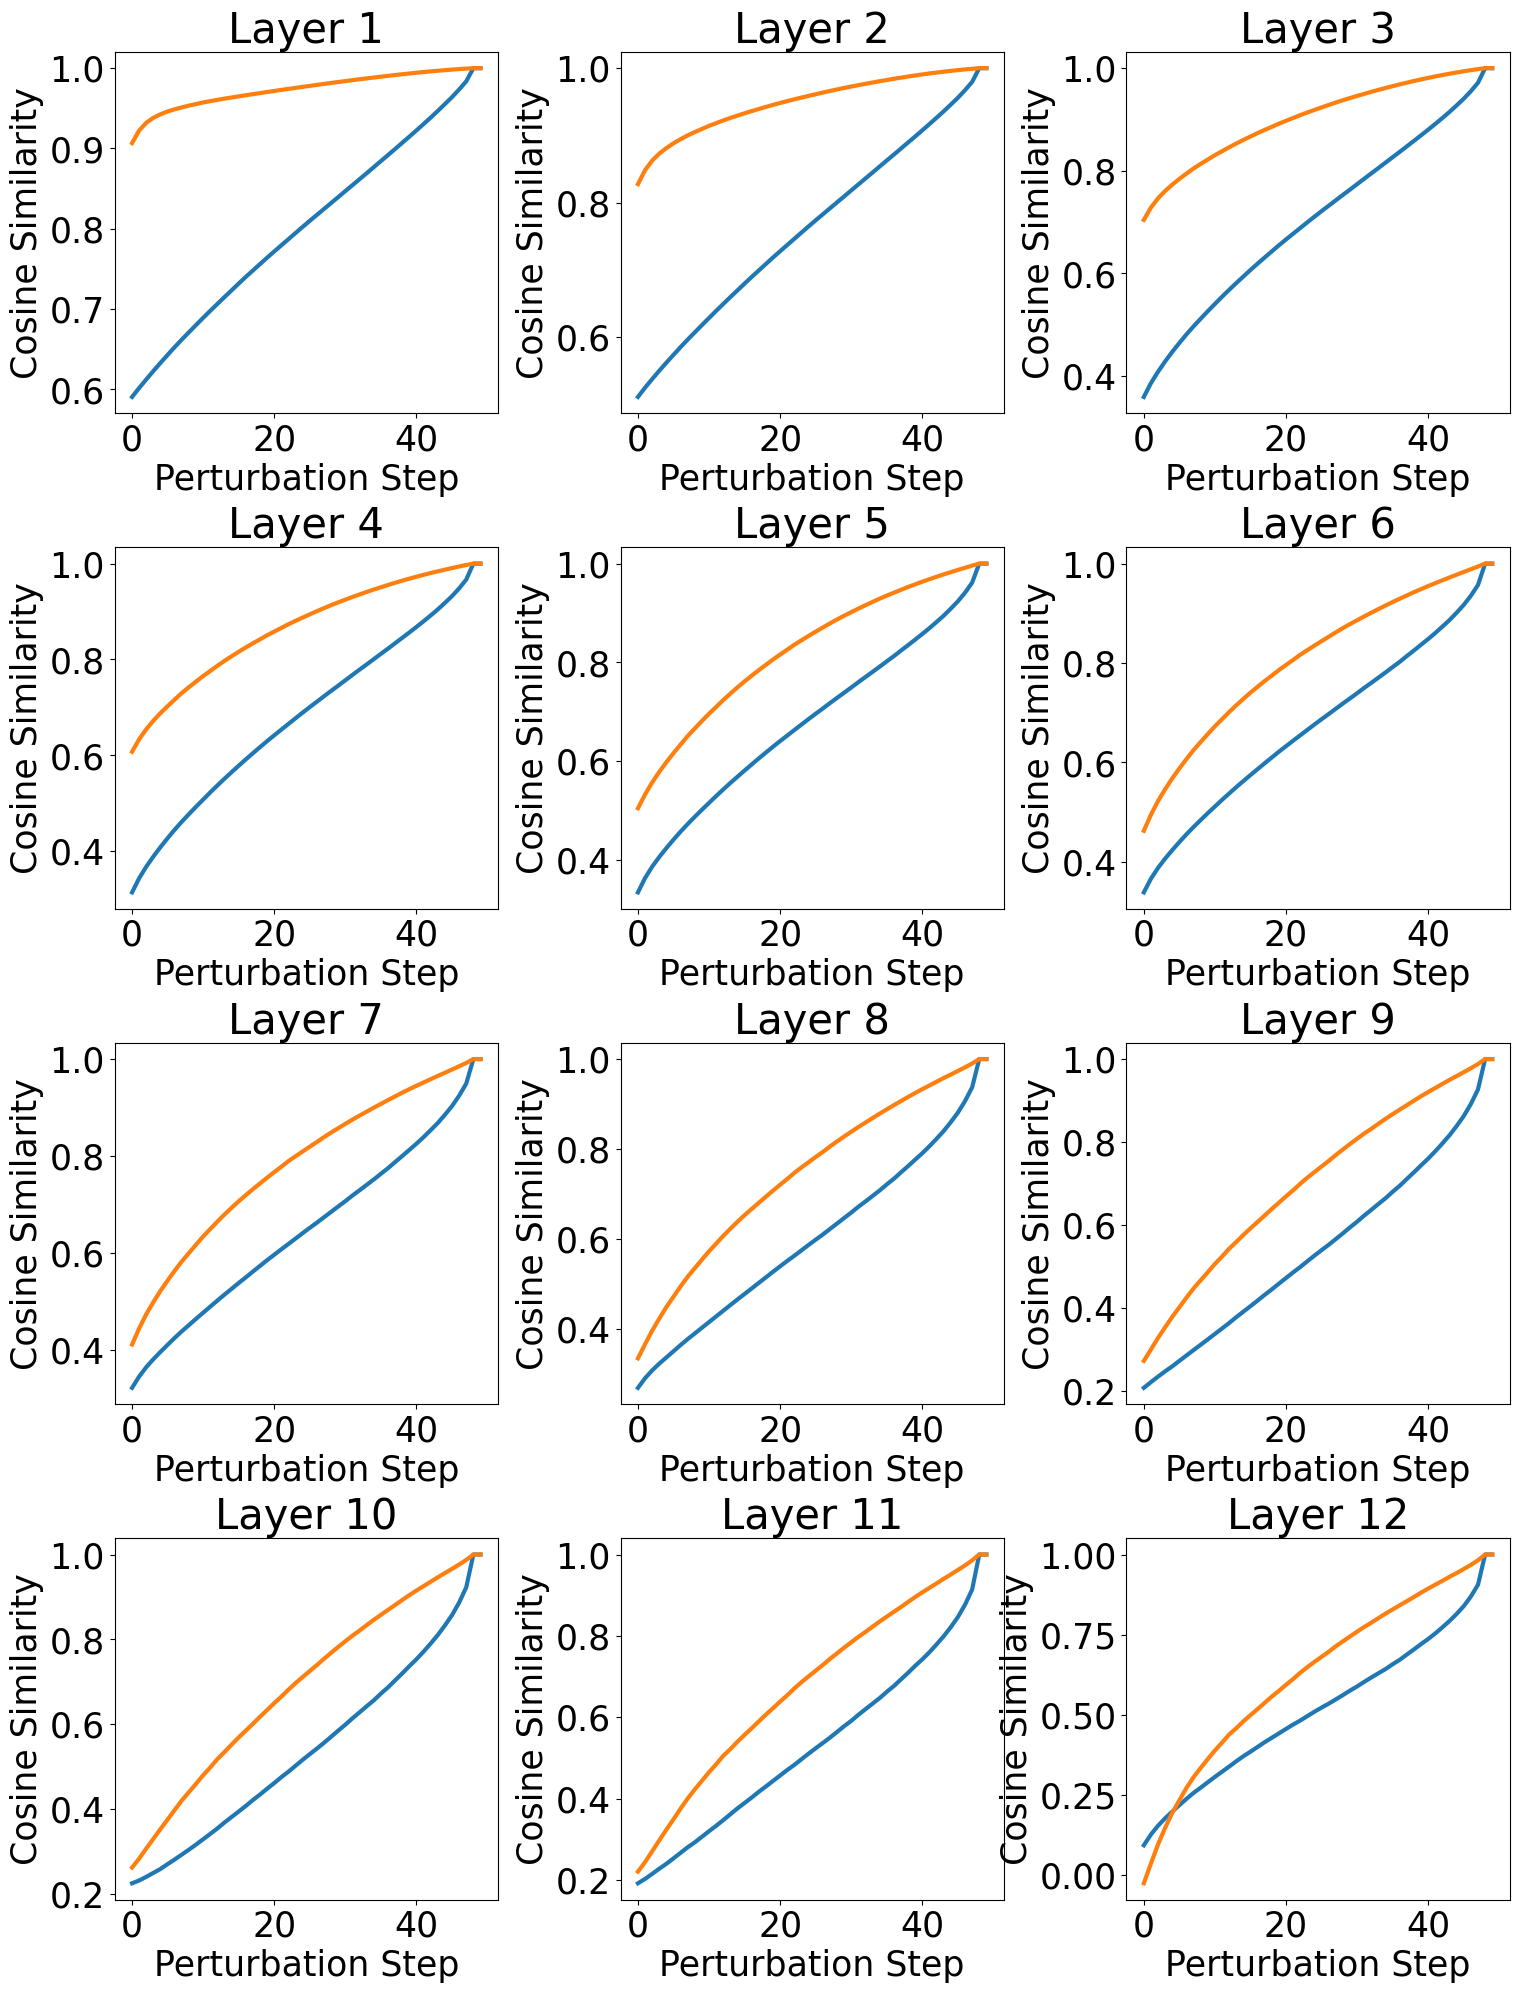

In [10]:
plt.rcParams.update({'font.size': 25})

# plot the insertion information in this cell
plt.title("Average Insertion Test Results")
plt.plot(data_input_pert_smooth[0], label="IPM", linewidth=3)
plt.plot(data_attn_pert[0], label="APM", linewidth=3)
plt.legend()
plt.show()

# plot the cosine similarities 
fig, axs = plt.subplots(4, 3, figsize = (18, 24))
for i in range(12):
    row = i // 3
    col = i % 3
    axs[row, col].set_title("Layer " + str(i + 1))
    axs[row, col].set_ylabel("Cosine Similarity")
    axs[row, col].set_xlabel("Perturbation Step")
    axs[row, col].plot(np.array(data_input_pert_smooth[i + 14]), label="Insertion IPM", linewidth=3)
    axs[row, col].plot(np.array(data_attn_pert[i + 14]), label="Insertion APM", linewidth=3)

plt.subplots_adjust(hspace = 0.37, wspace = 0.32)
plt.plot()

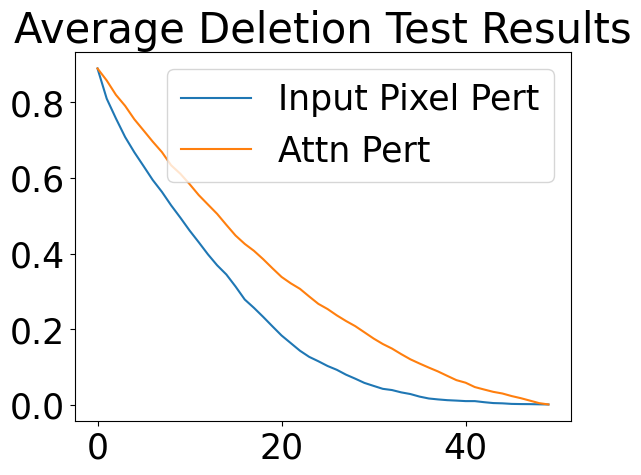

[]

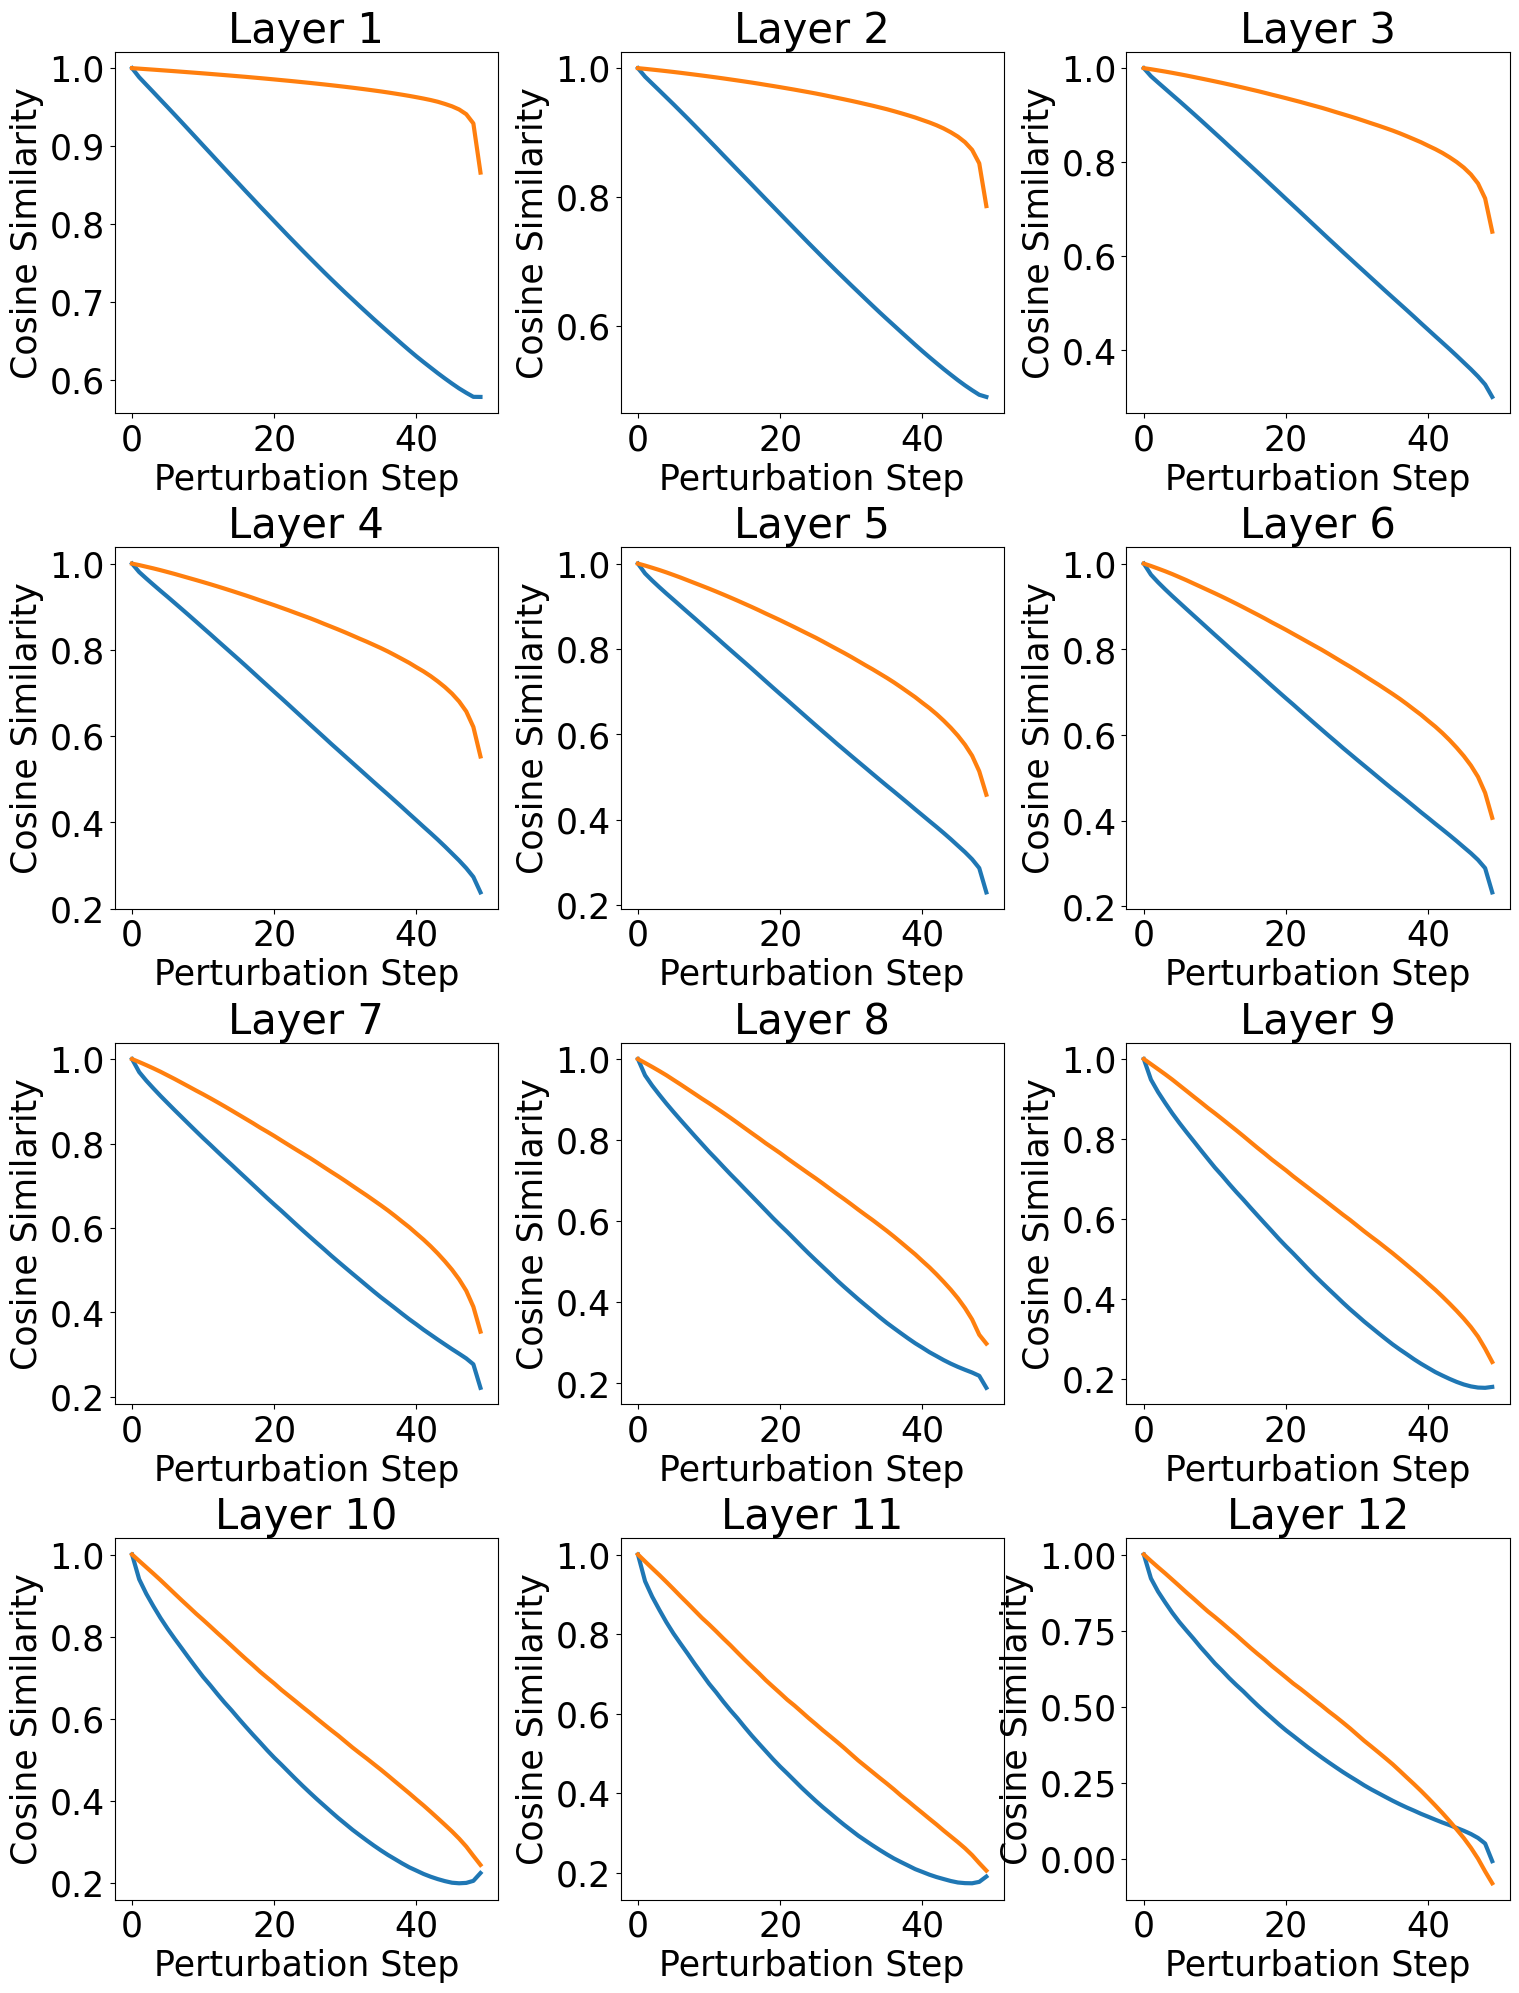

In [11]:
# plot the insertion information in this cell
plt.title("Average Deletion Test Results")
plt.plot(data_input_pert_smooth[1], label="Input Pixel Pert")
plt.plot(data_attn_pert[1], label="Attn Pert")
plt.legend()
plt.show()

# plot the cosine similarities 
fig, axs = plt.subplots(4, 3, figsize = (18, 24))
for i in range(12):
    row = i // 3
    col = i % 3
    axs[row, col].set_title("Layer " + str(i + 1))
    axs[row, col].set_ylabel("Cosine Similarity")
    axs[row, col].set_xlabel("Perturbation Step")
    axs[row, col].plot(np.array(data_input_pert_smooth[i + 38]), label="Deletion IPM", linewidth=3)
    axs[row, col].plot(np.array(data_attn_pert[i + 38]), label="Deletion APM", linewidth=3)

plt.subplots_adjust(hspace = 0.37, wspace = 0.32)
plt.plot()